In [119]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [120]:
brunson_data = pd.read_csv('../data/jalen_brunson.csv')
brunson_data.head(10)

,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,423.0,1.0,2024-10-22,NYK,@,BOS,L 109-132,1,24:30,...,1,1,2,0,0,4,3,22,12.3,-23
1,2.0,424.0,2.0,2024-10-25,NYK,NaN,IND,W 123-98,1,29:55,...,3,5,5,0,0,1,1,26,20.7,36
2,3.0,425.0,3.0,2024-10-28,NYK,NaN,CLE,L 104-110,1,37:36,...,3,3,7,0,0,1,2,21,10.6,0
3,4.0,426.0,4.0,2024-10-30,NYK,@,MIA,W 116-107,1,36:22,...,2,2,9,0,0,1,0,22,17.3,5
4,5.0,427.0,5.0,2024-11-01,NYK,@,DET,W 128-98,1,30:40,...,1,1,5,2,0,2,2,36,28.4,23
5,6.0,428.0,6.0,2024-11-04,NYK,@,HOU,L 97-109,1,42:25,...,2,3,8,1,0,1,2,29,21.9,-8
6,7.0,429.0,7.0,2024-11-06,NYK,@,ATL,L 116-121,1,36:45,...,3,3,4,0,0,3,3,21,10.7,-5
7,8.0,430.0,8.0,2024-11-08,NYK,NaN,MIL,W 116-94,1,31:46,...,1,2,9,1,0,0,2,15,14.7,28
8,9.0,431.0,9.0,2024-11-10,NYK,@,IND,L 121-132,1,40:37,...,6,6,10,0,0,3,4,33,28.9,-8
9,10.0,432.0,10.0,2024-11-12,NYK,@,PHI,W 111-99,1,34:52,...,3,3,5,1,0,6,1,18,8.5,7


In [121]:
brunson_data.describe()

,Rk,Gcar,Gtm
count,82.000000,65.00000,82.000000
mean,38.512195,455.00000,41.500000
std,20.237018,18.90767,23.815261
min,1.000000,423.00000,1.000000
25%,21.250000,439.00000,21.250000
50%,40.500000,455.00000,41.500000
75%,60.750000,471.00000,61.750000
max,65.000000,487.00000,82.000000


In [122]:
brunson_data.isnull()
print(brunson_data.shape)

(83, 34)


In [123]:
brunson_clean = brunson_data
print(brunson_clean.shape)

(83, 34)


In [124]:
inactive = brunson_clean['PTS'] == "Inactive"
no_dress = brunson_clean['PTS'] == "Did Not Dress"

inactive = brunson_clean['+/-'] == "Inactive"
no_dress = brunson_clean['+/-'] == "Did Not Dress"


brunson_data_cleaned = brunson_clean.drop(brunson_clean[inactive | no_dress].index)

print(brunson_data_cleaned.shape)
brunson_data_cleaned.tail(20)

(66, 34)


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
47,47.0,469.0,48.0,2025-01-29,NYK,NaN,DEN,W 122-112,1,36:17,...,4,4,15,2,1,2,1,30,34.8,16
48,48.0,470.0,49.0,2025-02-01,NYK,NaN,LAL,L 112-128,1,40:22,...,2,2,7,1,0,6,3,17,4.9,-17
49,49.0,471.0,50.0,2025-02-03,NYK,NaN,HOU,W 124-118,1,36:47,...,4,6,10,2,0,4,1,42,35.5,12
50,50.0,472.0,51.0,2025-02-04,NYK,@,TOR,W 121-115,1,33:57,...,1,1,5,2,1,1,2,28,21.2,1
51,51.0,473.0,52.0,2025-02-08,NYK,NaN,BOS,L 104-131,1,36:04,...,0,0,5,0,0,2,1,36,28.5,-19
52,52.0,474.0,53.0,2025-02-11,NYK,@,IND,W 128-115,1,22:44,...,2,2,7,0,0,3,5,8,2.4,10
53,53.0,475.0,54.0,2025-02-12,NYK,NaN,ATL,W 149-148 (OT),1,42:40,...,2,3,8,0,0,3,3,36,28.0,-11
54,54.0,476.0,55.0,2025-02-20,NYK,NaN,CHI,W 113-111 (OT),1,38:29,...,3,3,12,1,1,2,1,22,19.1,3
55,55.0,477.0,56.0,2025-02-21,NYK,@,CLE,L 105-142,1,27:36,...,4,4,4,1,0,3,3,26,18.9,-17
56,56.0,478.0,57.0,2025-02-23,NYK,@,BOS,L 105-118,1,37:32,...,3,3,4,1,0,4,0,22,13.0,-9


In [125]:
brunson_data_cleaned2 = brunson_data_cleaned.iloc[:-1 , :]

brunson_data_cleaned2.tail(20) 


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
46,46.0,468.0,47.0,2025-01-27,NYK,NaN,MEM,W 143-106,1,25:26,...,0,1,6,2,0,1,4,20,16.9,14
47,47.0,469.0,48.0,2025-01-29,NYK,NaN,DEN,W 122-112,1,36:17,...,4,4,15,2,1,2,1,30,34.8,16
48,48.0,470.0,49.0,2025-02-01,NYK,NaN,LAL,L 112-128,1,40:22,...,2,2,7,1,0,6,3,17,4.9,-17
49,49.0,471.0,50.0,2025-02-03,NYK,NaN,HOU,W 124-118,1,36:47,...,4,6,10,2,0,4,1,42,35.5,12
50,50.0,472.0,51.0,2025-02-04,NYK,@,TOR,W 121-115,1,33:57,...,1,1,5,2,1,1,2,28,21.2,1
51,51.0,473.0,52.0,2025-02-08,NYK,NaN,BOS,L 104-131,1,36:04,...,0,0,5,0,0,2,1,36,28.5,-19
52,52.0,474.0,53.0,2025-02-11,NYK,@,IND,W 128-115,1,22:44,...,2,2,7,0,0,3,5,8,2.4,10
53,53.0,475.0,54.0,2025-02-12,NYK,NaN,ATL,W 149-148 (OT),1,42:40,...,2,3,8,0,0,3,3,36,28.0,-11
54,54.0,476.0,55.0,2025-02-20,NYK,NaN,CHI,W 113-111 (OT),1,38:29,...,3,3,12,1,1,2,1,22,19.1,3
55,55.0,477.0,56.0,2025-02-21,NYK,@,CLE,L 105-142,1,27:36,...,4,4,4,1,0,3,3,26,18.9,-17


In [126]:
brunson_data_cleaned2['PTS'] = brunson_data_cleaned2['PTS'].astype(int)
brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)

brunson_data_cleaned2.describe()

C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\1252659368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['PTS'] = brunson_data_cleaned2['PTS'].astype(int)
C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\1252659368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)


,Rk,Gcar,Gtm,PTS,+/-
count,65.00000,65.00000,65.000000,65.000000,65.000000
mean,33.00000,455.00000,34.415385,26.000000,2.246154
std,18.90767,18.90767,21.109012,8.977402,14.221496
min,1.00000,423.00000,1.000000,8.000000,-23.000000
25%,17.00000,439.00000,17.000000,20.000000,-8.000000
50%,33.00000,455.00000,33.000000,25.000000,0.000000
75%,49.00000,471.00000,50.000000,31.000000,12.000000
max,65.00000,487.00000,81.000000,55.000000,36.000000


In [127]:
brunson_data_cleaned2[['PTS', '+/-']].corr()

,PTS,+/-
PTS,1.000000,-0.062049
+/-,-0.062049,1.000000


(65, 34)


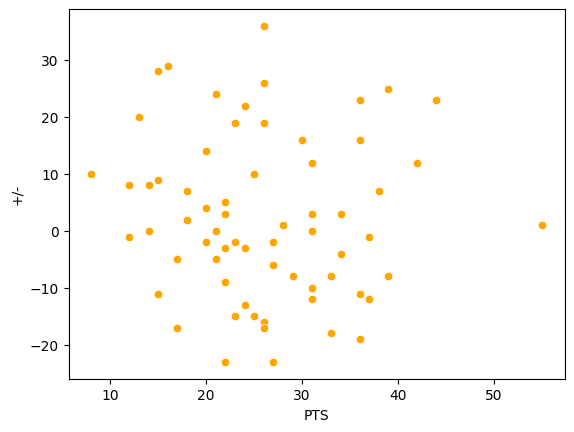

In [128]:
sns.scatterplot(x='PTS', y='+/-', data=brunson_data_cleaned2, color='orange')
print(brunson_data_cleaned2.shape)

In [144]:
brunson_data_cleaned2['2P'] = brunson_data_cleaned2['2P'].astype(int)
brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)

C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\2333491986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['2P'] = brunson_data_cleaned2['2P'].astype(int)
C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\2333491986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)


In [146]:
brunson_data_cleaned2[['2P', '+/-']].corr()

,2P,+/-
2P,1.000000,-0.227941
+/-,-0.227941,1.000000


<Axes: xlabel='2P', ylabel='+/-'>

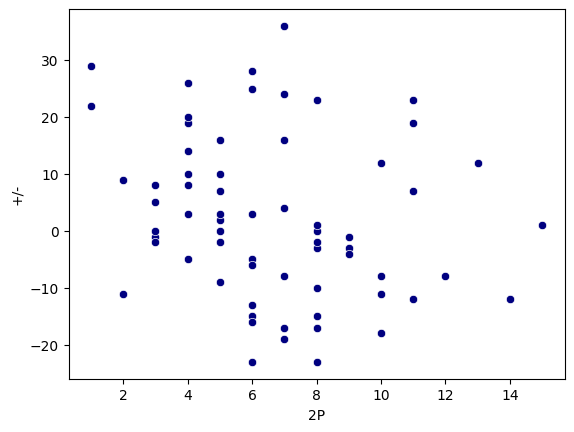

In [147]:
sns.scatterplot(x='2P', y='+/-', data=brunson_data_cleaned2, color='Navy')

In [148]:
brunson_data_cleaned2['3P'] = brunson_data_cleaned2['3P'].astype(int)
brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)

C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\1849927568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['3P'] = brunson_data_cleaned2['3P'].astype(int)
C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\1849927568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)


In [149]:
brunson_data_cleaned2[['3P', '+/-']].corr()

,3P,+/-
3P,1.000000,0.305793
+/-,0.305793,1.000000


<Axes: xlabel='3P', ylabel='+/-'>

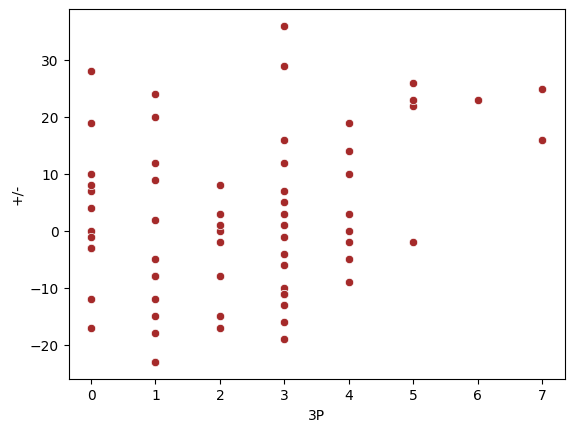

In [150]:
sns.scatterplot(x='3P', y= '+/-', color='Brown', data=brunson_data_cleaned2)

In [154]:
brunson_data_cleaned2['AST'] = brunson_data_cleaned2['AST'].astype(int)
brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)

C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\388539174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['AST'] = brunson_data_cleaned2['AST'].astype(int)
C:\Users\Ja-Ron Young\AppData\Local\Temp\ipykernel_18324\388539174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brunson_data_cleaned2['+/-'] = brunson_data_cleaned2['+/-'].astype(int)


In [155]:
brunson_data_cleaned2[['AST', '+/-']].corr()

,AST,+/-
AST,1.000000,0.202465
+/-,0.202465,1.000000


<Axes: xlabel='AST', ylabel='+/-'>

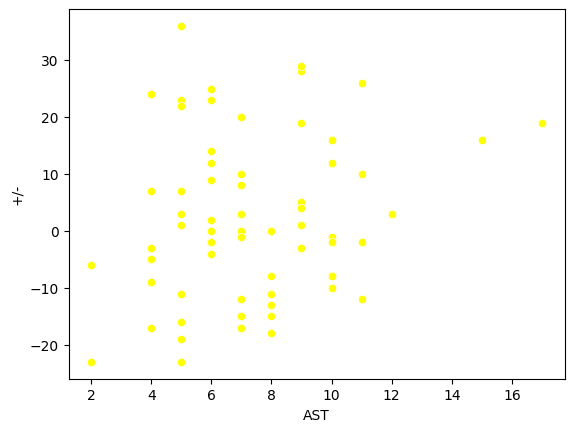

In [157]:
sns.scatterplot(x='AST', y= '+/-', data=brunson_data_cleaned2, color='yellow')

I set out to find out what offensive stat most effected Jalen Brunson's +/-; assists, points, two point shots made or three point shots made. I calculated Pearson's r for each stat and they were .2 for assists which is a low correlation, -.06 for points which is no correlation, -.22 for two pointers which is low, and .3 for three pointers which is a medium correlation.

The strongest relationship with +/- was 3 pointers which is kind of surprising. Brunson is a %38 3 point shooter which is good but not great, in comparison with his 2 point makes, which have a negative correlation and Brunson shoots %54 there. Obviously threes are worth more than twos but it's still surprising.  

My recommendation for Jalen is to shoot more 3 point shots in general and shoot more 2 point shots when he plays the sixers(my team!).